In [1]:
!pip install --upgrade tensorflow

In [2]:
import os  # Operating system-specific functionality.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import numpy as np  # Numerical computing library for handling arrays and mathematical operations.
import matplotlib.image as mpimg  # Library for reading and displaying images.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Part of TensorFlow for real-time data augmentation during model training.
import tensorflow as tf  # Deep learning framework.
from tensorflow.keras.models import Sequential  # Keras sequential model for building neural networks.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Keras layers for building neural networks.
from tensorflow.keras.callbacks import ModelCheckpoint  # Callback in Keras for saving the model during training.
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Setting random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow successfully updated to version:", tf.__version__)


TensorFlow successfully updated to version: 2.15.0


In [3]:
# Setting the path to the dataset directory
dataset_path = r"C:\Users\Bhoomika Madhu Suma\Downloads\archive (1)\dataset"

# Listing the contents (files and directories) of the  dataset 
os.listdir(dataset_path)

['test', 'train', 'validation']

In [4]:
# Creating path for the training subset of the dataset
train_path = os.path.join(dataset_path, 'train')

# Creating path for the validation subset of the dataset
validation_path = os.path.join(dataset_path, 'validation')

# Creating path for the test subset of the dataset
test_path = os.path.join(dataset_path, 'test')

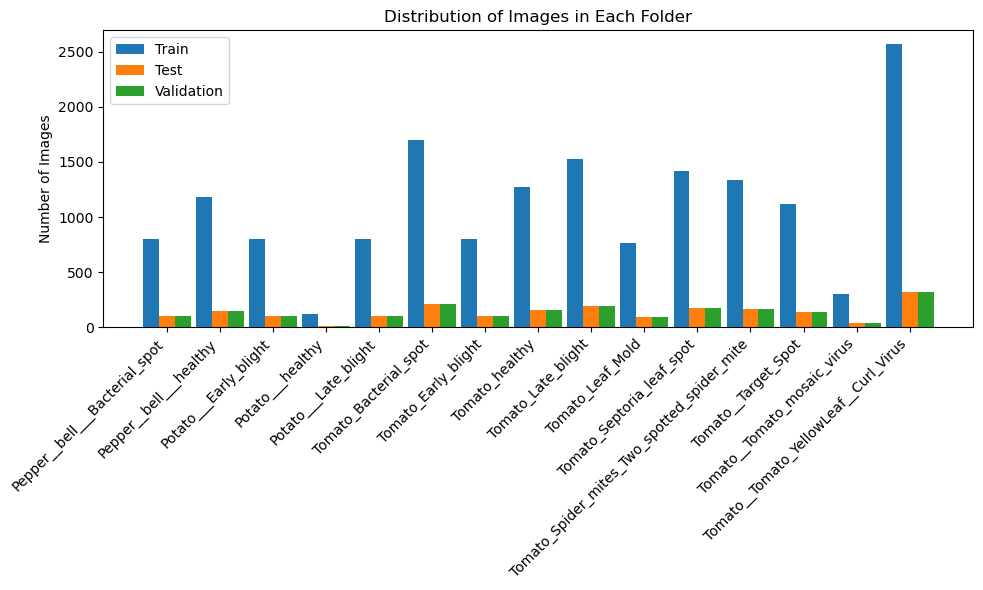

In [5]:
# Defining the folders representing different subsets of the dataset
folders = ['train', 'test', 'validation']

# Dictionary to store the lengths of subfolders in each dataset subset
subfolder_lengths = {folder: {} for folder in folders}

# Iterating through each folder (train, test, validation)
for folder in folders:
    # Getting the list of subfolders within the current dataset subset
    subfolders = os.listdir(os.path.join(dataset_path, folder))
    
    # Iterating through each subfolder
    for subfolder in subfolders:
        # Calculating the number of files (images) in the current subfolder
        subfolder_length = len(os.listdir(os.path.join(dataset_path, folder, subfolder)))
        
        # Storing the subfolder length in the dictionary
        subfolder_lengths[folder][subfolder] = subfolder_length

# Extracting subfolder names and their respective lengths for plotting
subfolder_names = list(subfolder_lengths['train'].keys())
train_lengths = list(subfolder_lengths['train'].values())
test_lengths = list(subfolder_lengths['test'].values())
val_lengths = list(subfolder_lengths['validation'].values())

# Setting up parameters for the bar plot
x = np.arange(len(subfolder_names))
width = 0.3

# Creating a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, train_lengths, width, label='Train')
rects2 = ax.bar(x, test_lengths, width, label='Test')
rects3 = ax.bar(x + width, val_lengths, width, label='Validation')

# Adding labels and legend to the plot
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images in Each Folder')
ax.set_xticks(x)
ax.set_xticklabels(subfolder_names, rotation=45, ha='right')
ax.legend()

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

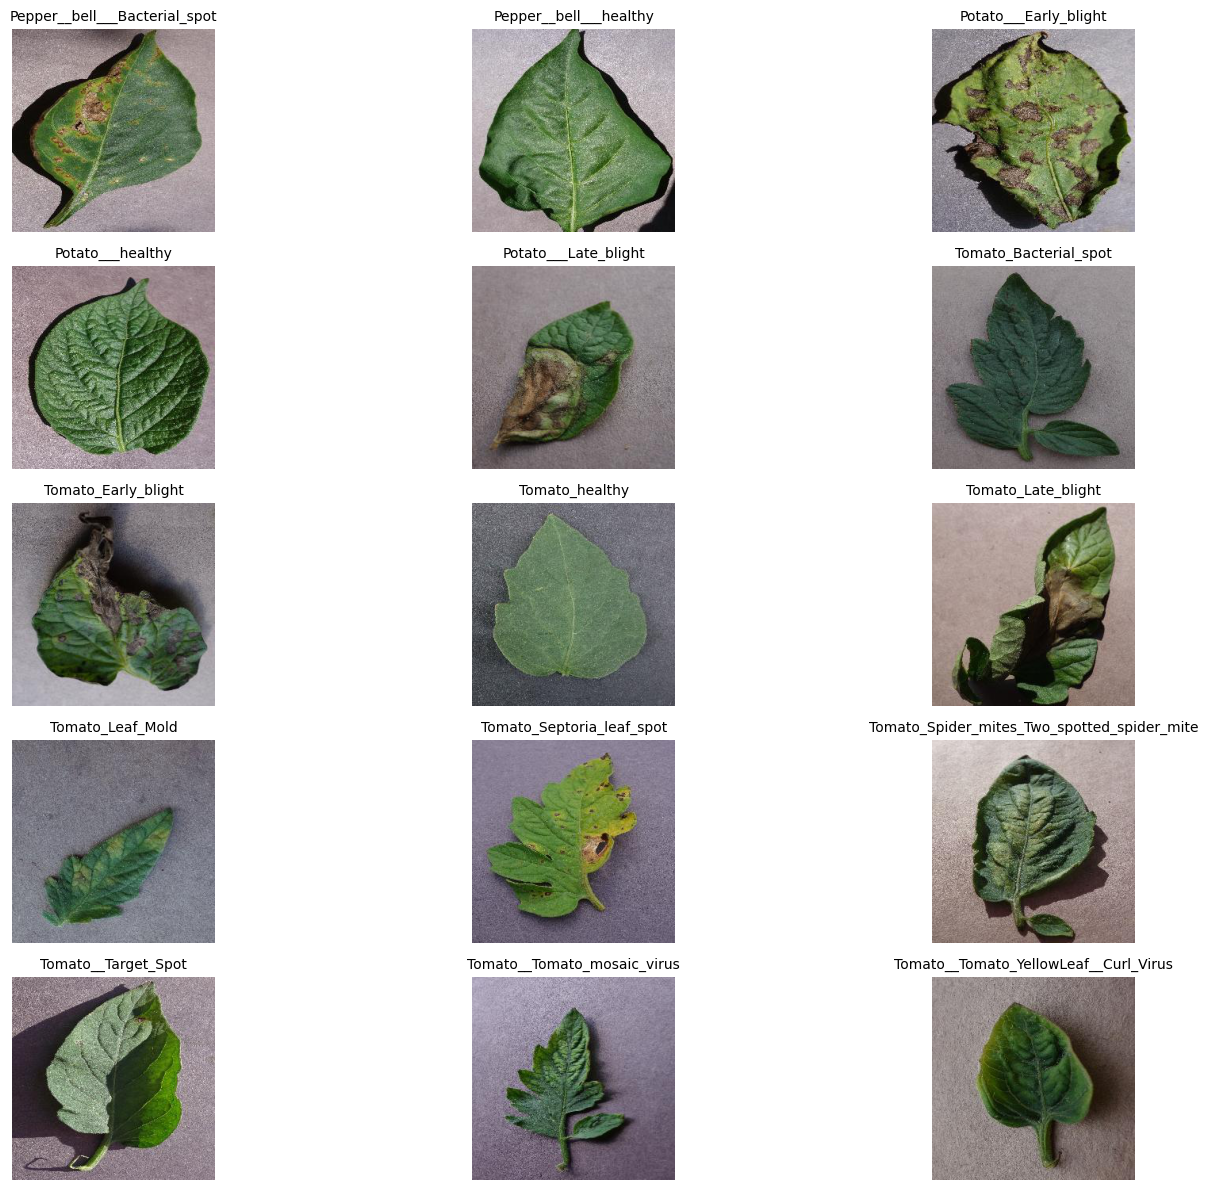

In [6]:
# Create a grid to display the images
num_cols = 3  # Number of columns in the grid
num_rows = 5  # Number of rows in the grid

# Create a matplotlib figure and axis
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# Loop through subfolders and display an image from each
for i, subfolder in enumerate(subfolders):
    img = [image for image in os.listdir(os.path.join(train_path,subfolder))][0]

    img_path = os.path.join(train_path, subfolder, img)  # Get the first image in the subfolder
    img = mpimg.imread(img_path)  # Load the image
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(subfolder, color='black', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [7]:
# Define batch size and image shape for data augmentation
batch_size = 32
image_shape = (256, 256)

# Create an ImageDataGenerator for training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,  # Rescale pixel values to the range [0, 1]
    shear_range=0.2,  # Apply shear transformation with a shear intensity of 0.2
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,  # Randomly flip images vertically
    brightness_range=[0.5, 1.5],  # Adjust brightness between 50% and 150%
    rotation_range=40,  # Rotate images by up to 40 degrees
    zoom_range=0.2  # Randomly zoom into images by 20%
)

# Create a flow generator from the training directory using the defined data augmentation settings
train_generator = train_datagen.flow_from_directory(
    train_path,  # Path to the training dataset
    target_size=image_shape,  # Resize images to the specified shape
    batch_size=batch_size,  # Set the batch size
    class_mode="categorical"  # Use categorical mode for multi-class classification
)

Found 16504 images belonging to 15 classes.


In [8]:
# Create an ImageDataGenerator for validation data without augmentation
validation_datagen = ImageDataGenerator(
    rescale=1/255  # Rescale pixel values to the range [0, 1]
)

# Create a flow generator from the validation directory
validation_generator = validation_datagen.flow_from_directory(
    validation_path,  # Path to the validation dataset
    target_size=image_shape,  # Resize images to the specified shape
    batch_size=batch_size,  # Set the batch size
    class_mode="categorical"  # Use categorical mode for multi-class classification
)

Found 2070 images belonging to 15 classes.


In [9]:
# Create an ImageDataGenerator for test data without augmentation
test_datagen = ImageDataGenerator(
    rescale=1/255  # Rescale pixel values to the range [0, 1]
)

# Create a flow generator from the test directory
test_generator = test_datagen.flow_from_directory(
    test_path,  # Path to the test dataset
    target_size=image_shape,  # Resize images to the specified shape
    batch_size=batch_size,  # Set the batch size
    class_mode="categorical",  # Use categorical mode for multi-class classification
    shuffle=False  # Do not shuffle the data to preserve order for evaluation
)

Found 2064 images belonging to 15 classes.


In [10]:
# Create a Sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape of (256, 256, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters and a 3x3 kernel, followed by a ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Repeat the pattern with two more convolutional layers and max pooling layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a one-dimensional array
model.add(Flatten())

# Add a dense layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))

# Add another dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 15 units (for 15 classes) and softmax activation for multiclass classification
model.add(Dense(15, activation='softmax'))

# Compile the model using the Adam optimizer, categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best weights during training
checkpoint_callback = ModelCheckpoint("best_epoch_weights.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Display a summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)       

In [11]:
# Calculate the number of steps per epoch for training and validation
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

# Set the number of training epochs 
epochs = 30

# Train the model using the fit method with training and validation generators
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_callback]  # Include the ModelCheckpoint callback for saving the best weights
)

# Find the epoch with the best accuracy on the validation set
best_epoch = np.argmax(history.history['val_accuracy']) + 1

# Print the best epoch information
print(f"Best epoch is ==> epoch {best_epoch}")

Epoch 1/30


515/515 [==============================] - ETA: 0s - loss: 1.6122 - accuracy: 0.4701
Epoch 1: val_accuracy improved from -inf to 0.56494, saving model to best_epoch_weights.h5
515/515 [==============================] - 652s 1s/step - loss: 1.6122 - accuracy: 0.4701 - val_loss: 1.3992 - val_accuracy: 0.5649
Epoch 2/30
515/515 [==============================] - ETA: 0s - loss: 0.8846 - accuracy: 0.6982
Epoch 2: val_accuracy improved from 0.56494 to 0.70508, saving model to best_epoch_weights.h5
515/515 [==============================] - 366s 710ms/step - loss: 0.8846 - accuracy: 0.6982 - val_loss: 0.9338 - val_accuracy: 0.7051
Epoch 3/30
515/515 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.7672
Epoch 3: val_accuracy improved from 0.70508 to 0.81934, saving model to best_epoch_weights.h5
515/515 [==============================] - 373s 725ms/step - loss: 0.6913 - accuracy: 0.7672 - val_loss: 0.5328 - val_accuracy: 0.8193
Epoch 4/30
515/515 [=========

515/515 [==============================] - ETA: 0s - loss: 0.1607 - accuracy: 0.9469
Epoch 26: val_accuracy did not improve from 0.96387
515/515 [==============================] - 371s 720ms/step - loss: 0.1607 - accuracy: 0.9469 - val_loss: 0.1636 - val_accuracy: 0.9492
Epoch 27/30
515/515 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9534
Epoch 27: val_accuracy improved from 0.96387 to 0.96631, saving model to best_epoch_weights.h5
515/515 [==============================] - 336s 652ms/step - loss: 0.1417 - accuracy: 0.9534 - val_loss: 0.1062 - val_accuracy: 0.9663
Epoch 28/30
515/515 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9536
Epoch 28: val_accuracy did not improve from 0.96631
515/515 [==============================] - 382s 742ms/step - loss: 0.1399 - accuracy: 0.9536 - val_loss: 0.2044 - val_accuracy: 0.9380
Epoch 29/30
515/515 [==============================] - ETA: 0s - loss: 0.1533 - accuracy: 0.9501
Epoch 29: val_accura

In [12]:
# Set the best_model variable to the original model
best_model = model

# Compile the best_model using the Adam optimizer, categorical crossentropy loss, and accuracy as the metric
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the best weights saved during training
best_model.load_weights(r'best_epoch_weights.h5')

# Save the entire best_model (architecture and weights) to a file named "plant_leaf_diseases_model.h5"
best_model.save("plant_leaf_diseases_model.h5")

# Indicate that training is complete, and the best model has been saved
print("Training done, and the best model is saved.")



Training done, and the best model is saved.


In [13]:
# Evaluate the best_model on the test data using the evaluate method
evaluation = best_model.evaluate(test_generator, verbose=0)

# Print the test accuracy and test loss rounded to 2 and 3 decimal places, respectively
print(f"Test Accuracy = {round(evaluation[1], 2)}")
print(f"Test Loss = {round(evaluation[0], 3)}")

Test Accuracy = 0.97
Test Loss = 0.093


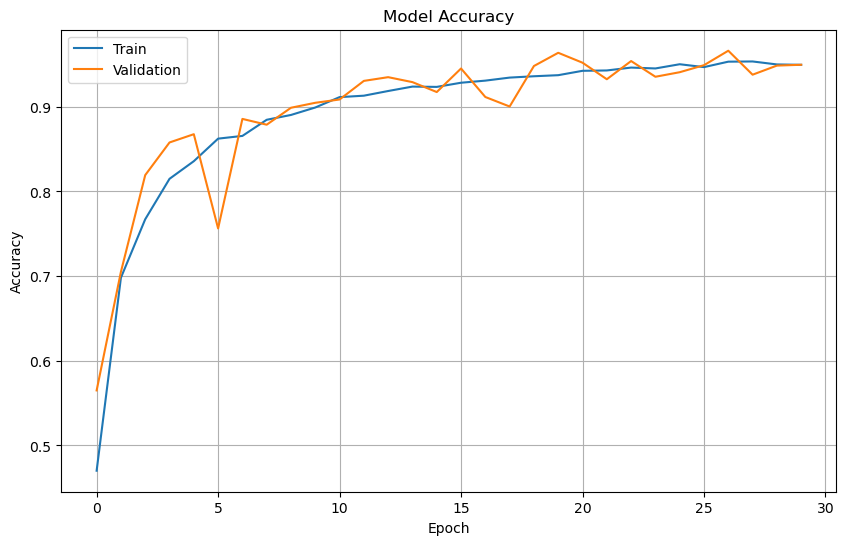

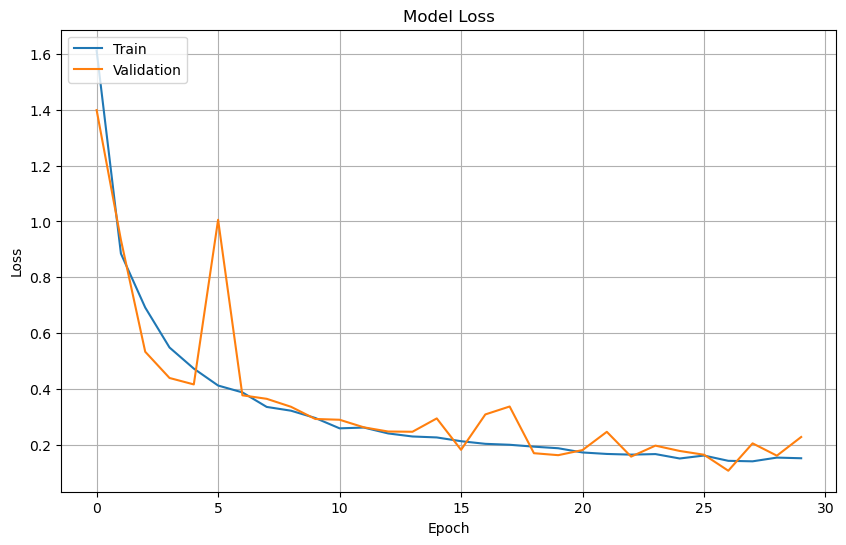

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()